# CS 498 AML HW 6

#### Roshan Rajan (rjrajan2), Kirsten Wong (kewong2), Kenneth Zhang (kfzhang2)

In [271]:
%matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

## EM Topic Models

The UCI Machine Learning dataset repository hosts several datasets recording word counts for documents here. You will use the NIPS dataset.<br><br> You will find:<br> (a) a table of word counts per document and <br>
(b) a vocabulary list for this dataset at the link. You must implement the multinomial mixture of topics model, lectured in class.<br><br>
For this problem, you should write the clustering code yourself (i.e. not use a package for clustering).
Cluster this to 30 topics, using a simple mixture of multinomial topic model, as lectured in class.
Produce a graph showing, for each topic, the probability with which the topic is selected.
Produce a table showing, for each topic, the 10 words with the highest probability for that topic.

### Initialization

In [272]:
# Read files.
# docword stores the document word counts, vocab stores the vocabulary list.
import os
dirname = os.getcwd() + "/docword.nips.noheader.txt"
docword = np.loadtxt(dirname)
dirname = os.getcwd() + "/vocab.nips.txt"
with open(dirname) as f:
    vocab = f.readlines()
vocab = [x.strip() for x in vocab] 

In [273]:
# Transform data into a 1500 x 12419 matrix where each doc is a data point, and each column i is a value
# indicating the frequency of word number i. Matrix should be mostly empty.
docdata = np.zeros((1501,12420))
    
for i in range(0,docword.shape[0]):
    docdata[docword[i][0].astype(int)][docword[i][1].astype(int)] += docword[i][2]


In [274]:
# Use k-means to initialize centers
from sklearn.cluster import KMeans

In [275]:
# Create k-means object and train it on dataset (~150 MB of data), took ~45 seconds
km = KMeans(n_clusters = 30, random_state = 0)
km.fit(docdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [279]:
docdata_t = np.transpose(docdata)

In [280]:
km_words = KMeans(n_clusters = 30, random_state = 0)
km_words.fit(docdata_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [281]:
word_dist = km_words.transform(docdata_t)

In [283]:
# Initial p values
for i in range(0,word_dist.shape[1]):
    word_dist[:,i] /= np.sum(word_dist[:,i])
word_probs = word_dist

In [297]:
log_prob.shape

(12420, 30)

In [ ]:
# EM using p
# Store initial guess for cluster centers, and blobs.
init_clst = km_words.cluster_centers_
init_blobs = km_words.labels_

# Running values for cluster centers (updated throughout loop at M step)
curr_clst = init_clst

# Running values for cluster weights (updated throughout loop at M Step)
pi = np.zeros(curr_clst.shape[0])

# Calculate pi's. Will have same indices as blobs in init_blobs.
for i in range(0,init_blobs.shape[0]):
    pi[init_blobs[i]] += 1.0
pi /= init_blobs.shape[0]

# E step
Q = 0.0
all_w = np.zeros((word_dist.shape[0],curr_clst.shape[0]))
maxes = np.zeros((init_clst.shape[0]))
log_prob = np.log(word_probs)
new_probs = np.zeros((word_probs.shape[0], word_probs.shape[1]))


for i in range(0,docdata_t.shape[0]):
    for j in range(0,curr_clst.shape[0]):

        #find max
        w_vals = np.zeros((curr_clst.shape[0]))
        
        for l in range(0, curr_clst.shape[0]):
            currVal = 0.0;
            for k in range(0, docdata_t.shape[1]):
                currVal += docdata_t[i, k]*log_prob[k, l]
            currVal += np.log(pi[l])
            w_vals[l] = currVal
            
        maxVal = np.max(w_vals)
        
        w_num = np.exp(w_vals[j] - maxVal)
        
        w_den = 0.0
        for l in range(0, curr_clst.shape[0]):
            w_den += np.exp(w_vals[l] - maxVal)    
        
        w = w_num/w_den
        all_w[i][j] = w
        new_probs[:, j] += docdata_t[:,i] * w

for j in range(0,all_w.shape[1]):
    new_probs[j] /= np.sum(all_w[:,j])
    

new_pi = np.sum(all_w,0) / (all_w.shape[0])
curr_clst = new_probs
pi = new_pi

Q += np.sum(all_w,0)



In [305]:
km_words.cluster_centers_.shape

(30, 1501)

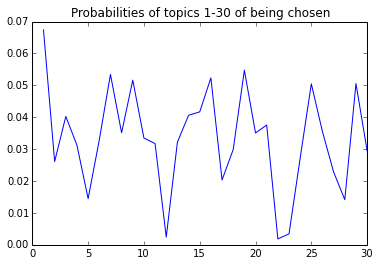

In [326]:
plt.plot(range(1,31),pi2)
plt.title('Probabilities of topics 1-30 of being chosen')

In [353]:
np.transpose(word_probs).shape

(30, 12420)

array([[ 11417.,   1482.,   7579.,   6056.,  10305.,   8140.,   9402.,
         11183.,   4378.,   3603.],
       [ 11297.,   2182.,   2575.,   9336.,   8139.,   8142.,   5554.,
          5045.,     39.,   9134.]])

In [367]:
#(np.transpose(word_probs).argsort()[-10:][::-1]).shape
word_probs_t = np.transpose(word_probs)
top10 = np.zeros((30,10))
for i in range(word_probs_t.shape[0]):
    top10[i] = word_probs_t[i].argsort()[::-1][-10:]
# arr.argsort()[-3:][::-1]

In [372]:
vocab

['a2i',
 'aaa',
 'aaai',
 'aapo',
 'aat',
 'aazhang',
 'abandonment',
 'abbott',
 'abbreviated',
 'abcde',
 'abe',
 'abeles',
 'abi',
 'abilistic',
 'abilities',
 'ability',
 'abl',
 'able',
 'ables',
 'ablex',
 'ably',
 'abnormal',
 'abort',
 'abound',
 'abramowicz',
 'abrash',
 'abrupt',
 'abruptly',
 'abscissa',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstr',
 'abstract',
 'abstracted',
 'abstraction',
 'abu',
 'abundances',
 'aca',
 'acad',
 'academic',
 'academy',
 'acc',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'acceptor',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accommodate',
 'accommodated',
 'accomodate',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accord',
 'accordance',
 'according',
 'account',
 'accounted',
 'accounting',


In [376]:
vocab[[1,2]]

TypeError: list indices must be integers, not list

In [382]:
for i in range(0,top10.shape[0]):
    print "Top 10 words for topic #",i+1
    for j in range(0,10):
        print vocab[int(top10[i][j])]
    print "\n"

Top 10 words for topic # 1
cover
tresp
aux
bialek
gdr
tnm
chmm
gmd
pda
a2i


Top 10 words for topic # 2
training
cases
numbered
largely
smaller
performances
resultant
testable
generalize
erties


Top 10 words for topic # 3
tional
consisted
databases
researcher
performance
performer
introductory
ieice
abstracted
referred


Top 10 words for topic # 4
processor
numbered
architectures
training
active
connectionism
layered
outseg
hierar
unitary


Top 10 words for topic # 5
referred
progress
worm
mdt
rewarded
barycentric
abstracted
suzanna
policy
singhal


Top 10 words for topic # 6
approached
probable
setpoint
distributional
neurally
numbered
resultant
parameterised
database
modeled


Top 10 words for topic # 7
approached
van
methodologies
cases
paperclip
stephen
numbered
resultant
problematic
algorithmic


Top 10 words for topic # 8
difficulties
extractor
consisted
importantly
presentation
introductory
abstracted
referred
feb
features


Top 10 words for topic # 9
paperclip
spacecraft
van
a

### Algorithm

In [ ]:
# EM algorithm. Input: dataset, initial cluster centers, computed above

# Helper function: calculates probability data point was produced by cluster centers
# Inputs: data point, cluster centers, and covariance matrix
# Returns float between 0 and 1

    
    
# Main function for EM algorithm
def EM(ds,init_clst,num_iters):
    curr_clst = init_clst
    # Running values for cluster weights (updated throughout loop at M Step)
    pi = np.zeros(curr_clst.shape[0])

    # Calculate pi's. Will have same indices as blobs in init_blobs.
    for i in range(0,init_blobs.shape[0]):
        pi[init_blobs[i]] += 1.0
    pi /= init_blobs.shape[0]

    for n in num_iters:
        for i in range(1,500,10):
            total_w = 0.0
            for j in range(0,pi.shape[0]):
        #         print i,j
                dist_j = ds[i]-pi[j]

                # Calculate value for w_ij
                w_num = (np.exp(-0.5*np.dot(dist_j,dist_j)*pi[j]))
        #         w_num = np.log(w_num)
        #         print "w_num:",w_num

                # I'm using a for loop because trying to vectorize this is hurting my brain
                dist_k = curr_clst*(-1)+ds[i]
                w_den = 0.0
                for k in range(0,dist_k.shape[0]):
                    w_den += np.exp(-0.5 * np.dot(dist_k[k],dist_k[k]) *pi[k])

        #         print "w_den:",w_den    

                w = w_num / w_den
                all_w[i][j] = w
                dist = ds[i] - curr_clst[j]
                Q += (-0.5 * np.transpose(dist)*dist + np.log(pi[j])) * w

                new_mu[j] += ds[i] * w

        for j in range(0,all_w.shape[1]):
            new_mu[j] /= np.sum(all_w[:,j])

        new_pi = np.sum(all_w,0) / (all_w.shape[0])
        curr_clst = new_mu
        pi = new_pi
            
    

## Image Segmentation using EM

You can segment an image using a clustering method - each segment is the cluster center to which a pixel belongs. In this exercise, you will represent an image pixel by its r, g, and b values (so use color images!). Use the EM algorithm applied to the mixture of normal distribution model lectured in class to cluster image pixels, then segment the image by mapping each pixel to the cluster center with the highest value of the posterior probability for that pixel. You must implement the EM algorithm yourself (rather than using a package).<br><br>
Segment each of the test images to 10, 20, and 50 segments. You should display these segmented images as images, where each pixel's color is replaced with the mean color of the closest segment


### Initialization

In [133]:
# Read files.

dirname = os.getcwd() + "/img1.jpg"
img1 = scipy.misc.imread(dirname)
dirname = os.getcwd() + "/img2.jpg"
img2 = scipy.misc.imread(dirname)
dirname = os.getcwd() + "/img3.jpg"
img3 = scipy.misc.imread(dirname)

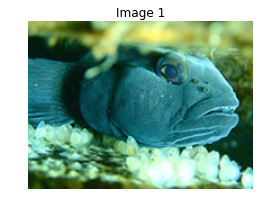

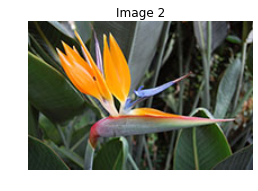

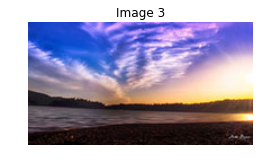

In [189]:
plt.figure(figsize=(4,4))
plt.imshow(img1)
plt.axis('off')
plt.title('Image 1')

plt.figure(figsize=(4,4))
plt.imshow(img2)
plt.axis('off')
plt.title('Image 2')

plt.figure(figsize=(4,4))
plt.imshow(img3)
plt.axis('off')
plt.title('Image 3')

In [135]:
mat1 = np.reshape(img1,(img1.shape[0]*img1.shape[1],3))
mat2 = np.reshape(img2,(img2.shape[0]*img2.shape[1],3))
mat3 = np.reshape(img3,(img3.shape[0]*img3.shape[1],3))

### Algorithm
We will use a method similar to the previous question, where we estimate initial cluster centers using k-means, and then use EM. 

We will identify one special test image. You should segment this to 20 segments using five different start points, and display the result for each case. Is there much variation in the result?

In [158]:
def EM_Img(clst, labels, image, it=2):
    # Store initial guess for cluster centers, and blobs.
    init_clst = clst
    init_blobs = labels

    # Running values for cluster centers (updated throughout loop at M step)
    curr_clst = init_clst

    # Running values for cluster weights (updated throughout loop at M Step)
    pi = np.zeros(curr_clst.shape[0])

    # Calculate pi's. Will have same indices as blobs in init_blobs.
    for i in range(0,init_blobs.shape[0]):
        pi[init_blobs[i]] += 1.0
    pi /= init_blobs.shape[0]

    # E step
    Q = 0.0
    all_w = np.zeros((image.shape[0],curr_clst.shape[0]))
    new_mu = np.zeros(curr_clst.shape)


    for a in range(0, it):
        print "Iteration ",a," done"
        for i in range(1,image.shape[0]):
            total_w = 0.0
            for j in range(0,pi.shape[0]):
                #print i,j
                dist_j = image[i]-curr_clst[j]

                # Calculate value for w_ij
                w_num = (-0.5*np.dot(dist_j,dist_j)) + np.log(pi[j])


                # I'm using a for loop because trying to vectorize this is hurting my brain
                dist_k = curr_clst*(-1)+image[i]

                w_den_vals = np.zeros(dist_k.shape[0])

                for k in range(0,dist_k.shape[0]):
                    w_den_vals[k] = -0.5 * np.dot(dist_k[k],dist_k[k])
                maxDen = np.amax(w_den_vals)
                w_den = 0.0

                for k in range(0,dist_k.shape[0]):
                    w_den += np.exp(w_den_vals[k] - maxDen)*pi[k]

                w_den = maxDen + np.log(w_den);
                w = np.exp(w_num - w_den)

                all_w[i][j] = w
                dist = image[i] - curr_clst[j]
                

                new_mu[j] += image[i] * w

        for j in range(0,all_w.shape[1]):
            new_mu[j] /= np.sum(all_w[:,j])
        
        
        new_pi = np.sum(all_w,0) / (all_w.shape[0])
        curr_clst = new_mu
        pi = new_pi
        
        
    Q += np.sum(all_w,0)
    
    return curr_clst, pi, Q, all_w

In [251]:
km_1a = KMeans(n_clusters = 10, random_state = 0)
km_1a.fit(mat1)

km_2a = KMeans(n_clusters = 10, random_state = 0)
km_2a.fit(mat2)

km_3a = KMeans(n_clusters = 10, random_state = 0)
km_3a.fit(mat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [252]:
km_1b = KMeans(n_clusters = 20, random_state = 0)
km_1b.fit(mat1)

km_2b = KMeans(n_clusters = 20, random_state = 0)
km_2b.fit(mat2)

km_3b = KMeans(n_clusters = 20, random_state = 0)
km_3b.fit(mat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [253]:
km_1c = KMeans(n_clusters = 50, random_state = 0)
km_1c.fit(mat1)

km_2c = KMeans(n_clusters = 50, random_state = 0)
km_2c.fit(mat2)

km_3c = KMeans(n_clusters = 50, random_state = 0)
km_3c.fit(mat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [171]:
clst_1a, pi_1a, Q_1a, weights_1a = EM_Img(km_1a.cluster_centers_, km_1a.labels_, mat1)

Iteration  0  done
Iteration  1  done


In [164]:
clst_1b, pi_1b, Q_1b, weights_1b = EM_Img(km_1b.cluster_centers_, km_1b.labels_, mat1)

Iteration  0  done
Iteration  1  done


In [180]:
clst_1c, pi_1c, Q_1c, weights_1c = EM_Img(km_1c.cluster_centers_, km_1c.labels_, mat1)

Iteration  0  done
Iteration  1  done


In [258]:
def assign_px(orig_img,labels,centers):
    new_img = np.zeros((orig_img.shape))
    for i in range(orig_img.shape[0]):
        for j in range(orig_img.shape[1]):
            new_img[i,j] = np.round(centers[labels[i*orig_img.shape[1]+j]]).astype(int)
            
    return new_img

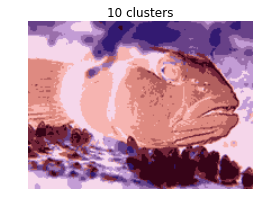

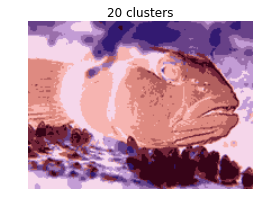

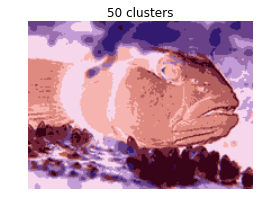

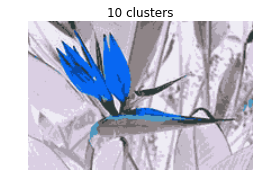

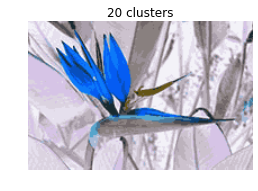

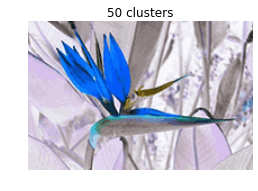

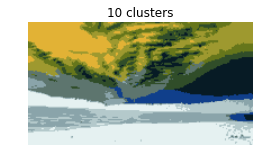

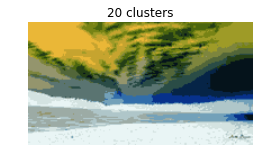

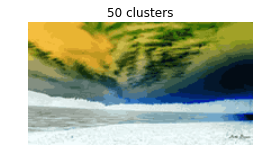

In [260]:
plt.figure(figsize=(4,4))
plt.imshow(clst_img1a)
plt.axis('off')
plt.title("10 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img1b)
plt.axis('off')
plt.title("20 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img1c)
plt.axis('off')
plt.title("50 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img2a)
plt.axis('off')
plt.title("10 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img2b)
plt.axis('off')
plt.title("20 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img2c)
plt.axis('off')
plt.title("50 clusters")


plt.figure(figsize=(4,4))
plt.imshow(clst_img3a)
plt.axis('off')
plt.title("10 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img3b)
plt.axis('off')
plt.title("20 clusters")

plt.figure(figsize=(4,4))
plt.imshow(clst_img3c)
plt.axis('off')
plt.title("50 clusters")